# Classificação de empresas para investimento a longo prazo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()

- Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com. Para o acesso de tais informações, foi necessário comprar uma conta
- Empresas com indisponibilidade de informações ficaram com seus respectivos campos vazios
- **Atributo situação (classe)**: este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10

In [2]:
dataset = pd.read_excel('BD Completo.xlsx')
print(dataset.shape)
dataset.head()

(377, 70)


,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,...,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,...,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.0,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,"neoenergia s.a (87,84)",8.0,alerta,0.21,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,"admistradora fortaliza ltda (89,14%)",11290.0,crescimento moderado,0.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dataset.info())
dataset.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Situação             377 non-null    object 
 1   Empresa              377 non-null    object 
 2   Segmento             374 non-null    object 
 3   Valor de M.          319 non-null    float64
 4   EV                   285 non-null    float64
 5   Majoritar.           361 non-null    object 
 6   Pes. Fisicas         358 non-null    float64
 7   Categoria            348 non-null    object 
 8   LPA                  336 non-null    float64
 9   LPA desconctado      317 non-null    float64
 10  VPA                  339 non-null    float64
 11  P/L                  316 non-null    float64
 12  P/L descontado       311 non-null    float64
 13  EV/EBITDA            132 non-null    float64
 14  P/VPA                313 non-null    float64
 15  DPA                  141 non-null    flo

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Situação,377,3,ruim,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empresa,377,377,aes elpa s.a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmento,374,104,energia eletrica,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor de M.,319.0,NaN,NaN,NaN,8596999442.269592,28352126872.385899,67506.0,141573508.5,878332957.0,5117960217.5,286689305243.0
EV,285.0,NaN,NaN,NaN,10217755714.421053,37948621223.278305,-26236953.0,285766537.0,1593725150.0,6411987332.0,499873636283.0
...,...,...,...,...,...,...,...,...,...,...,...
FCI/LL,135.0,NaN,NaN,NaN,272.71163,674.434183,0.68,55.0,145.0,277.0,7073.0
CAPEX,136.0,NaN,NaN,NaN,-1339.882353,6747.600243,-74622.0,-717.5,-209.5,-51.75,1350.0
FCL CAPEX,138.0,NaN,NaN,NaN,428.876812,1450.638175,-805.0,-22.0,82.5,373.25,10943.0
CAPEX/LL,135.0,NaN,NaN,NaN,235.848,586.035858,0.0,33.0,95.0,184.0,5473.0


In [4]:
dataset['Situação'].value_counts()

ruim     189
boa       99
medio     89
Name: Situação, dtype: int64

## Tratamento dados faltantes

In [5]:
#pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação         0
Empresa          0
Segmento         3
Valor de M.     58
EV              92
              ... 
FCI/LL         242
CAPEX          241
FCL CAPEX      239
CAPEX/LL       242
CAPEX/FCO      241
Length: 70, dtype: int64

Alguns atibutos serão retirados do dataset.

In [6]:
dataset.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF', 
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 
                      'Majoritar.'],
             axis = 1, inplace = True)

In [7]:
print(dataset.shape)
dataset.head()

(377, 32)


,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.57,0.56,36.03,...,0.86,49.00,11.0,3.94,4610.0,4508.0,545.0,1.02,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,18681.0,dividendos,0.18,0.18,0.80,...,1.72,58.00,15.0,2.40,776.0,828.0,583.0,0.94,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.16,0.15,2.07,...,NaN,NaN,NaN,1.24,12.0,8.0,9.0,1.50,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.21,0.20,1.23,...,0.04,5.25,23.0,1.15,74.0,7.0,42.0,10.57,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,0.60,10.42,...,0.25,NaN,NaN,1.01,6.0,6.0,3.0,1.00,0.50,0.0


In [8]:
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

Alguns atributos serão preenchidos com a média

In [9]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum()

<ipython-input-9-805df83fa7b6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64

Para a categoria, será retirado os registros com valores faltantes

In [10]:
dataset.dropna(inplace=True)
dataset.isnull().sum().sum()  # não sobrou nada

0

### Visualização e exploração

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA desconctado   347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 1

#### Situação

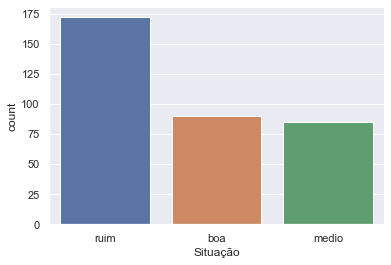

In [12]:
srn.countplot(x=dataset['Situação']);

In [13]:
dataset['Situação'].value_counts()

ruim     172
boa       90
medio     85
Name: Situação, dtype: int64

#### Segmento

In [14]:
dataset['Segmento'].value_counts().head(10)

energia eletrica                     40
bancos                               27
edificações                          17
fios e tecidos                       16
outros                               13
holdings diversificadas              11
exploração de imoveis                10
tecidos, vestuarios e calçados        7
telecomunicações                      6
exploração, refino e distribuição     6
Name: Segmento, dtype: int64

In [15]:
#np.unique(dataset['Segmento'])

Vemos que temos segmentos parecidos ou iguais que podem ser agrupados de outra forma!

In [16]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto  

  return segmento

In [17]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)
dataset['Segmento'].value_counts()

energia eletrica          40
bancos                    27
edificações               17
fios e tecidos            16
outros                    13
                          ..
material ferroviario       1
vestuario                  1
corretoras de seguros      1
minerais não metalicos     1
compressores e outros      1
Name: Segmento, Length: 85, dtype: int64

#### Categoria

In [18]:
dataset['Categoria'].value_counts()  # tem que corrigir crescimento

alerta                      243
crescimento moderado         48
dividendos                   36
crescimento                  17
dividendos + crescimento      2
crescimento                   1
Name: Categoria, dtype: int64

In [19]:
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'
    else:
        categoria = texto
    
    return categoria

In [20]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)
dataset['Categoria'].value_counts()

alerta                      243
crescimento moderado         48
dividendos                   36
crescimento                  18
dividendos + crescimento      2
Name: Categoria, dtype: int64

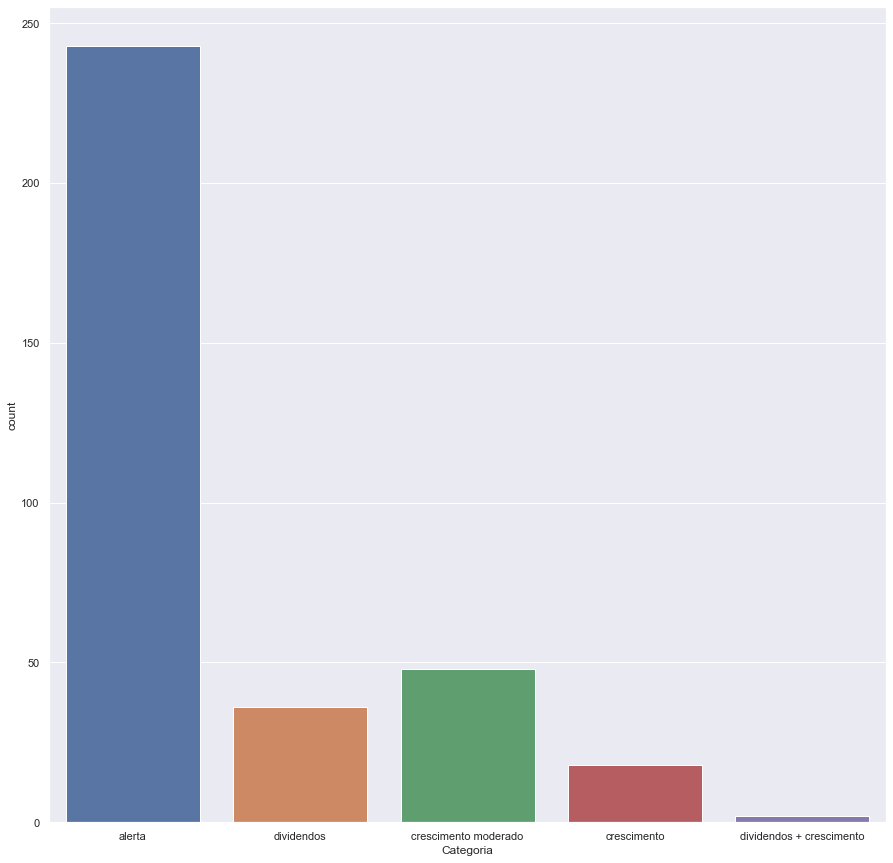

In [21]:
plt.figure(figsize=(15,15))
srn.countplot(x=dataset['Categoria']);

#### Dados numéricos

In [22]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Situação,347,3,ruim,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empresa,347,347,aes elpa s.a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmento,347,85,energia eletrica,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor de M.,347.0,NaN,NaN,NaN,8803913296.054127,27154374265.057571,67506.0,165180424.0,1362356687.0,8596999442.269592,286689305243.0
EV,347.0,NaN,NaN,NaN,10451643848.510538,34352437362.081059,-26236953.0,371696047.0,3583574107.0,10217755714.421053,499873636283.0
Pes. Fisicas,347.0,NaN,NaN,NaN,22260.63597,130989.249504,1.0,580.5,1773.0,6354.5,1803724.0
Categoria,347,5,alerta,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPA,347.0,NaN,NaN,NaN,-7.862101,65.493749,-806.67,-2.03,0.13,1.185,200.66
LPA desconctado,347.0,NaN,NaN,NaN,-9.044851,64.45679,-806.66,-5.68,0.086,1.06,160.78
VPA,347.0,NaN,NaN,NaN,38.573753,842.780784,-3804.86,2.695,9.47,22.565,14896.47


EX: Empresa com menor lucro por ação

In [23]:
dataset[dataset['LPA'] == dataset['LPA'].min()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,...,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


In [24]:
dataset[dataset['LPA desconctado'] == dataset['LPA desconctado'].min()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,...,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


EX: Empresa com maior lucro

In [25]:
dataset[dataset['LPA'] == dataset['LPA'].max()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
254,ruim,minasmaquinas s.a mmaq,material de transporte,8.596999e+09,1.021776e+10,1055.0,alerta,200.66,-8.723009,1605.35,...,0.31,18.0,100.0,1.49,130.0,51.0,47.0,2.55,0.92,79.0


In [26]:
dataset[dataset['LPA desconctado'] == dataset['LPA desconctado'].max()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
194,ruim,hercules s.a fabrica de talheres heta,utensilios domesticos,2121596.0,307121596.0,592.0,alerta,160.78,160.78,-656.86,...,1.720811,-360.0,25.0,62.646871,1.0,8.0,0.0,0.13,0.0,-7.0


<ipython-input-27-a2f8583569eb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=eixo);


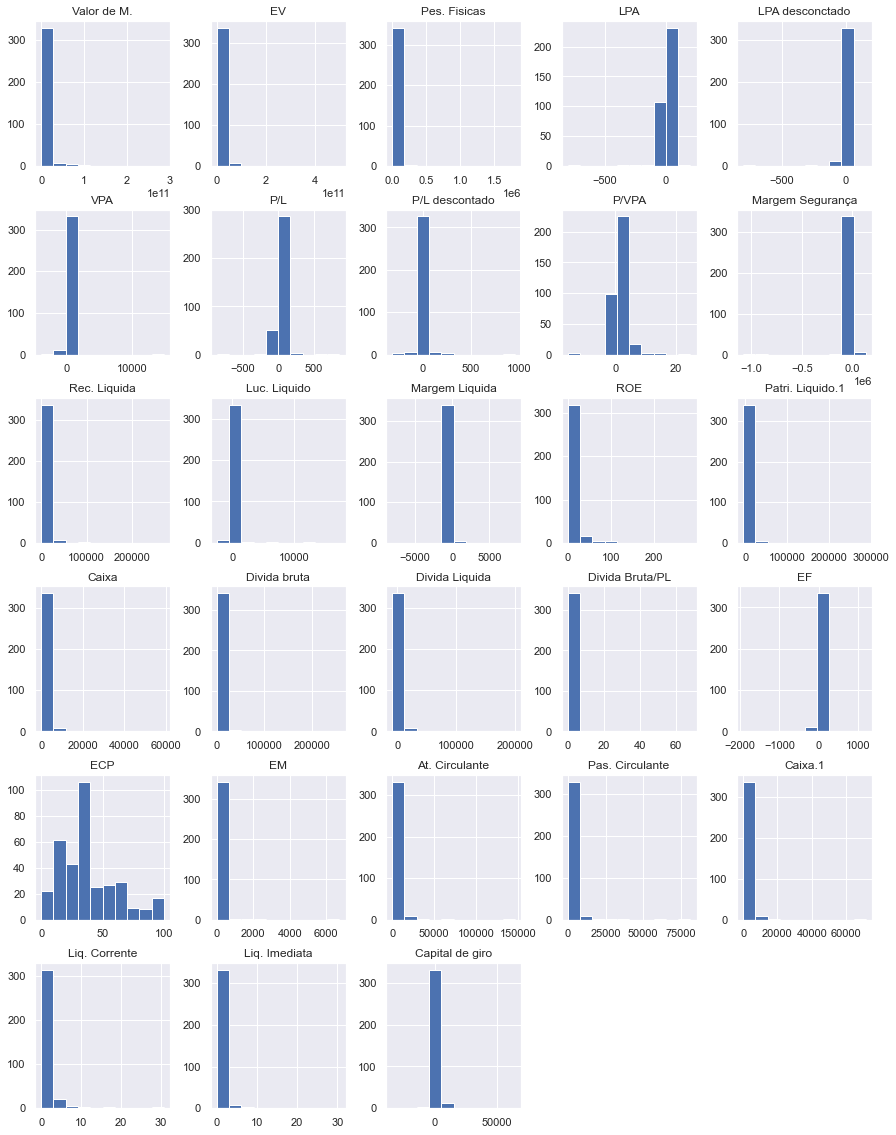

In [27]:
figura = plt.figure(figsize=(15,20))
eixo = figura.gca()
dataset.hist(ax=eixo);

### Correlação entre atributos

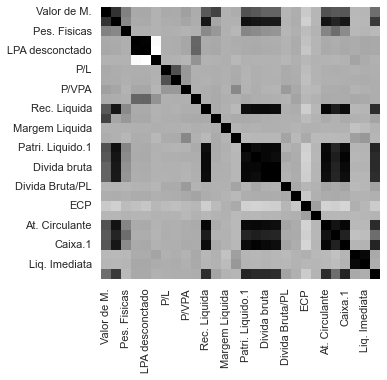

In [28]:
plt.figure(figsize=(5,5))
srn.heatmap(dataset.corr(), annot=False, cbar=False, cmap='binary');

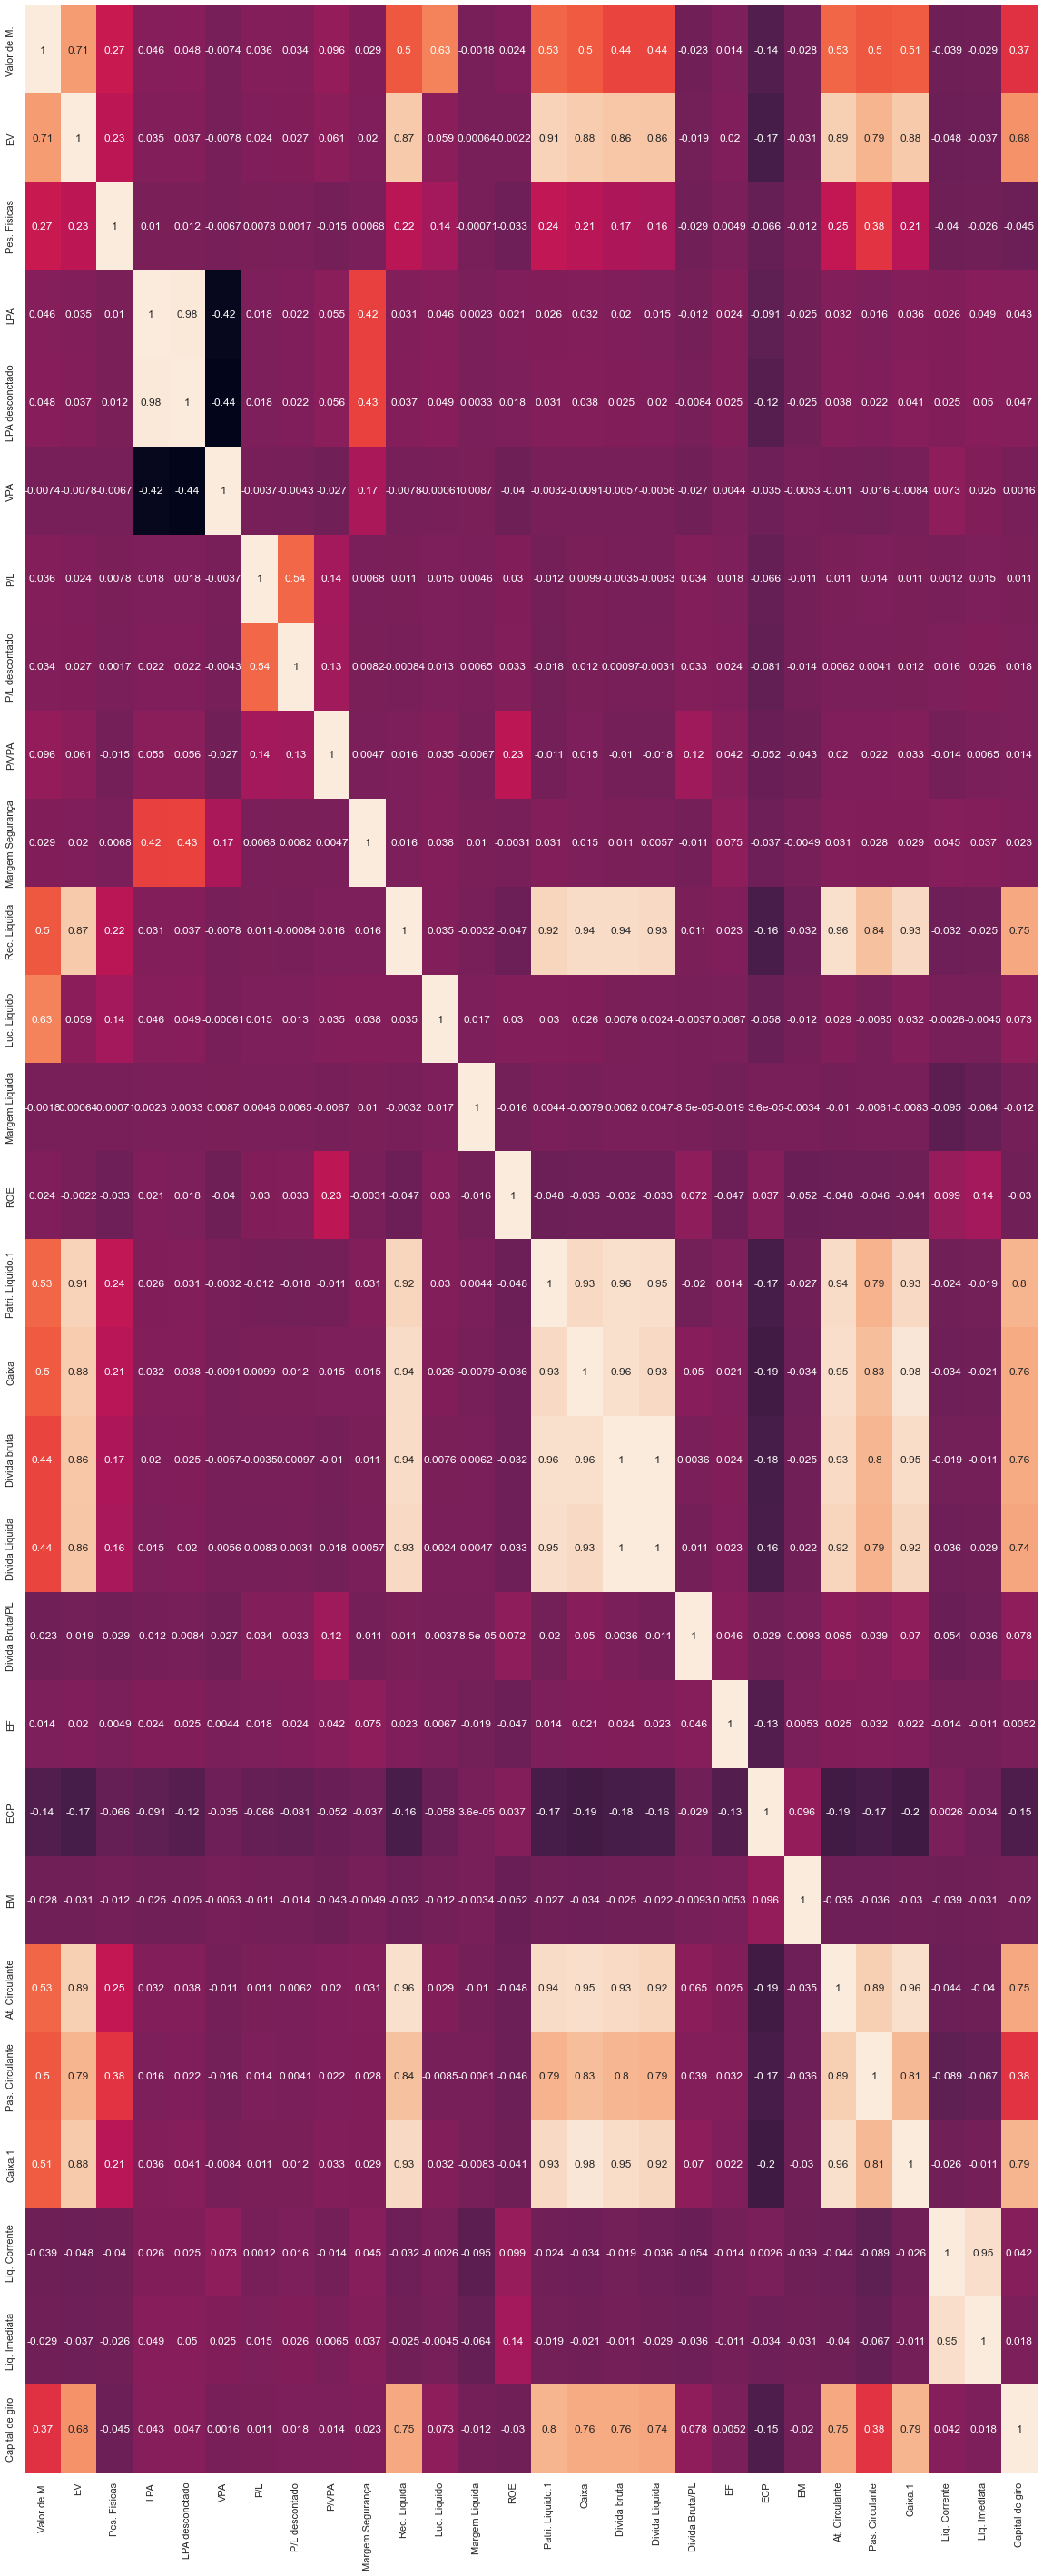

In [29]:
plt.figure(figsize=(20,50))
srn.heatmap(dataset.corr(), annot=True, cbar=False);

Os atributos tem uma correlação forte com outros atributos, então serão retirados do dataset, pois não são necessários.

In [30]:
atributos_corr = ['Rec. Liquida', 'Caixa', 'Divida bruta', 'LPA', 'Caixa.1', 'At. Circulante', 'Liq. Corrente']
dataset.drop(atributos_corr, axis=1, inplace=True)

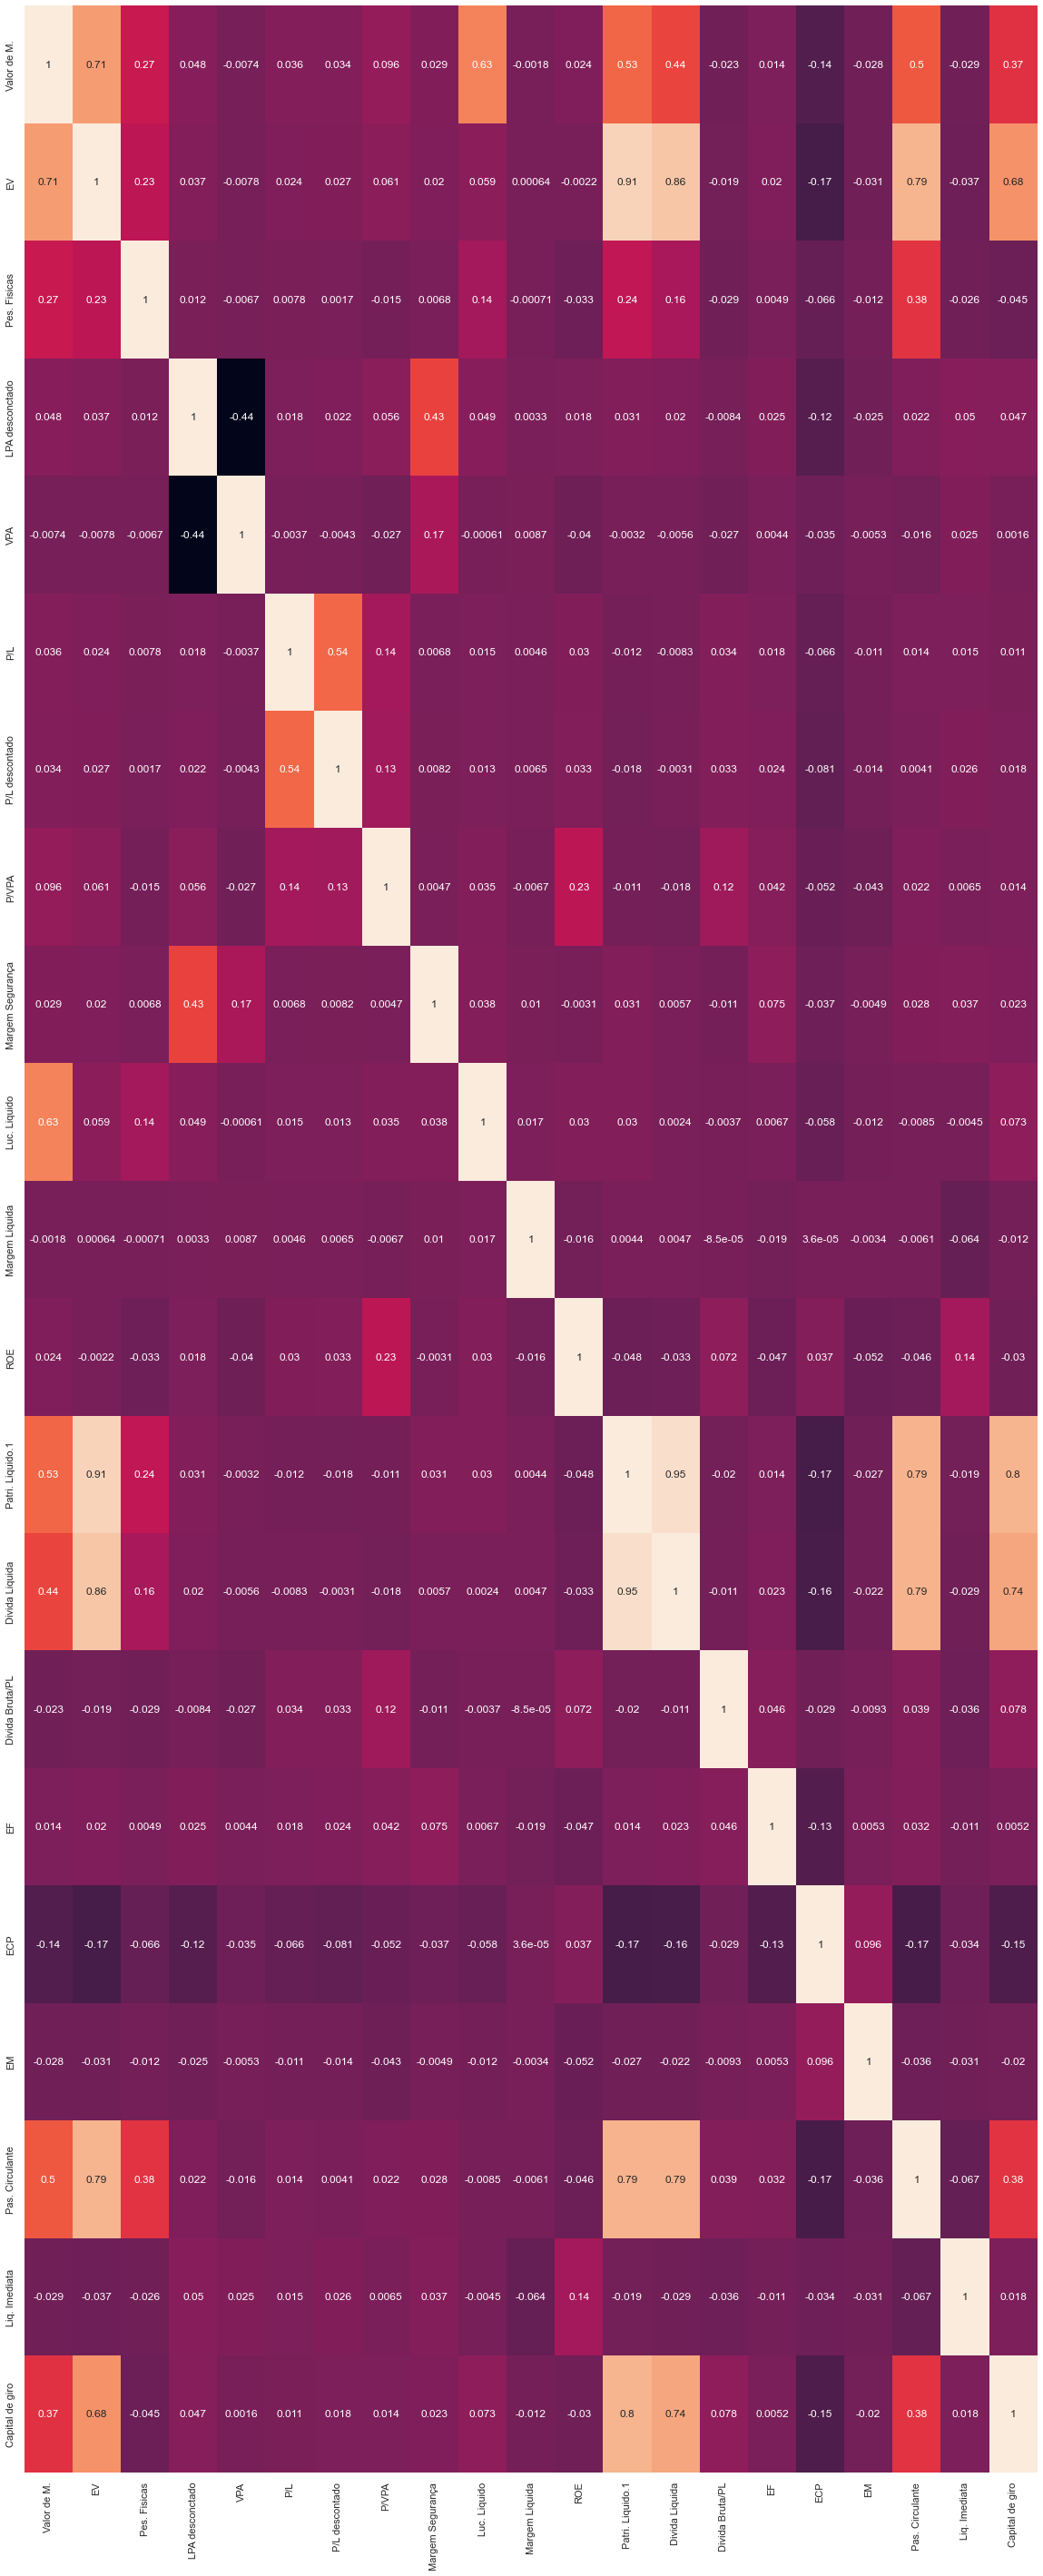

In [31]:
plt.figure(figsize=(20,50))
srn.heatmap(dataset.corr(), annot=True, cbar=False);

# temos menos celulas claras

### Variável dummy

Para variáveis categoricas

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA desconctado   347 non-null    float64
 8   VPA               347 non-null    float64
 9   P/L               347 non-null    float64
 10  P/L descontado    347 non-null    float64
 11  P/VPA             347 non-null    float64
 12  Margem Segurança  347 non-null    float64
 13  Luc. Liquido      347 non-null    float64
 14  Margem Liquida    347 non-null    float64
 15  ROE               347 non-null    float64
 16  Patri. Liquido.1  347 non-null    float64
 1

São elas: Situação, Segmento, Empresa e categoria.

#### Empresa

São 347 elementos unicos, então poderia ser retirada.

In [33]:
print(dataset.shape)
dataset['Empresa'].nunique()

(347, 25)


347

In [34]:
empresa = dataset['Empresa']
dataset.drop('Empresa', axis=1, inplace=True)
empresa.head()

0        aes elpa s.a 
1       tiet aes tiete
2        aflu afluente
3      aflu afluente t
4    rpad alfa holding
Name: Empresa, dtype: object

#### Situação

É a nossa variável resposta

In [35]:
y = dataset['Situação'].values
y.shape

(347,)

#### Segmento e Categoria

In [36]:
X_cat = dataset[['Segmento', 'Categoria']]
X_cat.head()

,Segmento,Categoria
0,energia eletrica,alerta
1,energia eletrica,dividendos
2,energia eletrica,alerta
3,energia eletrica,alerta
4,bancos,crescimento moderado


In [37]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_cat = pd.DataFrame(X_cat)
X_cat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
dataset_original = dataset.copy()

In [40]:
dataset.drop(['Segmento', 'Categoria', 'Situação'], axis=1, inplace=True)
dataset.head()

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,1.334627e+09,4.391657e+09,15969.0,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,...,20.66,2012.0,1567.00,0.860000,49.000000,11.000000,3.94,4508.0,0.12,102.0
1,1.519060e+10,1.021776e+10,18681.0,0.18,0.80,14.92,14.92,3.39,22.00,703.0,...,37.00,1812.0,2459.00,1.720000,58.000000,15.000000,2.40,828.0,0.70,-52.0
2,9.465319e+07,8.565319e+07,1898.0,0.15,2.07,31.55,31.55,2.42,-63.00,13.0,...,25.00,48.0,-8.00,1.720811,30.548746,38.872065,1.24,8.0,1.13,4.0
3,2.819886e+08,2.439886e+08,8.0,0.20,1.23,21.69,21.69,3.61,46.00,17.0,...,22.00,78.0,-31.00,0.040000,5.250000,23.000000,1.15,7.0,6.00,67.0
4,2.887665e+08,2.857665e+08,11290.0,0.60,10.42,5.65,5.65,0.32,116.00,45.0,...,6.00,721.0,-440.75,0.250000,30.548746,38.872065,1.01,6.0,0.50,0.0


In [41]:
dataset.index = X_cat.index

In [42]:
dataset = pd.concat([dataset, X_cat], axis=1)
print(dataset.shape)
dataset.head(2)

(347, 111)


,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.0,0.56,36.03,24.71,24.71,0.38,-0.53,555.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.0,0.18,0.80,14.92,14.92,3.39,22.00,703.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Normalização

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(dataset)
#dataset_norm

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [44]:
len(dataset_norm)

347

In [45]:
X = dataset_norm.copy()
X.shape, y.shape

((347, 111), (347,))

### Aplicação dos algorítmos

In [46]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [47]:
resultados_forest = []
resultados_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    random_forest = RandomForestClassifier()
    scores = cross_val_score(random_forest, X, y, cv=kfold)
    resultados_forest.append(scores.mean())
    
    neural = MLPClassifier(hidden_layer_sizes=(175, 175))  # (347 + 3)/2
    scores = cross_val_score(neural, X, y, cv=kfold)
    resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [48]:
resultados_forest

array([0.63092437, 0.64302521, 0.63655462, 0.63134454, 0.63647059,
       0.64865546, 0.62789916, 0.6489916 , 0.64260504, 0.63689076,
       0.65445378, 0.63991597, 0.65159664, 0.65344538, 0.63957983,
       0.63386555, 0.64268908, 0.63176471, 0.63411765, 0.64563025,
       0.65109244, 0.6310084 , 0.6402521 , 0.64260504, 0.63764706,
       0.64571429, 0.64823529, 0.64537815, 0.64268908, 0.64546218])

In [49]:
resultados_neural

array([0.52983193, 0.54453782, 0.55336134, 0.54445378, 0.53260504,
       0.55      , 0.53033613, 0.53605042, 0.5387395 , 0.56462185,
       0.54436975, 0.55352941, 0.55033613, 0.52731092, 0.54184874,
       0.54529412, 0.57647059, 0.54235294, 0.53882353, 0.55285714,
       0.54747899, 0.53588235, 0.5510084 , 0.52445378, 0.52495798,
       0.5587395 , 0.53915966, 0.56168067, 0.55941176, 0.53336134])

### Avaliação dos algoritmos

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f'Treinamento: X--> {X_train.shape}, y--> {y_train.shape}')
print(f'Teste: X--> {X_test.shape}, y--> {y_test.shape}')

Treinamento: X--> (277, 111), y--> (277,)
Teste: X--> (70, 111), y--> (70,)


#### Random Forest

In [76]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)
previsoes.shape

(70,)

In [67]:
random_forest.classes_

array(['boa', 'medio', 'ruim'], dtype=object)

In [68]:
accuracy_score(y_test, previsoes)

0.6428571428571429

<AxesSubplot:>

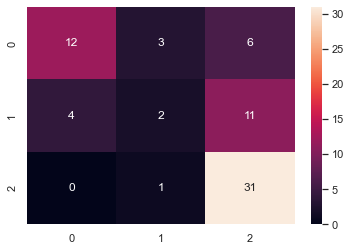

In [69]:
srn.heatmap(confusion_matrix(y_test, previsoes), annot=True)

In [70]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         boa       0.75      0.57      0.65        21
       medio       0.33      0.12      0.17        17
        ruim       0.65      0.97      0.78        32

    accuracy                           0.64        70
   macro avg       0.58      0.55      0.53        70
weighted avg       0.60      0.64      0.59        70



#### Vendo a resposta de um registro


In [79]:
teste = X_test[0].reshape(1, -1)
#teste

In [80]:
random_forest.predict(teste)

array(['ruim'], dtype=object)

In [83]:
len(random_forest.feature_importances_)  # atributos

111

In [85]:
np.argmax(random_forest.feature_importances_)  # atributo mais importante

3

In [87]:
for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
    print(nome, '=', importancia)

Valor de M. = 0.05955715690326929
EV = 0.041110869307412264
Pes. Fisicas = 0.04156247652575588
LPA desconctado = 0.08962673083952305
VPA = 0.03968117618710911
P/L = 0.03644464903681847
P/L descontado = 0.039798075493615984
P/VPA = 0.05364424569113905
Margem Segurança = 0.048635832235625724
Luc. Liquido = 0.05967372238824953
Margem Liquida = 0.04307452455669876
ROE = 0.033506719155475304
Patri. Liquido.1 = 0.03802522991788929
Divida Liquida = 0.031024638892310316
Divida Bruta/PL = 0.03602601206119878
EF = 0.02933312266469177
ECP = 0.02949061466026285
EM = 0.034595998100947475
Pas. Circulante = 0.03814866749385287
Liq. Imediata = 0.030985539577373857
Capital de giro = 0.030383818233169553
0 = 0.0006556813910425517
1 = 0.0025500308503208047
2 = 0.0011669345114372492
3 = 0.0010239866819309442
4 = 0.000991214759392178
5 = 0.0
6 = 0.000698489839650569
7 = 0.0006295577272306828
8 = 5.2215257532890345e-05
9 = 0.0005267101450918746
10 = 0.00440349493022999
11 = 0.00046740464380737757
12 = 0.001

In [112]:
caracteristicas = dataset.columns
importancias = random_forest.feature_importances_
indices = np.argsort(importancias)

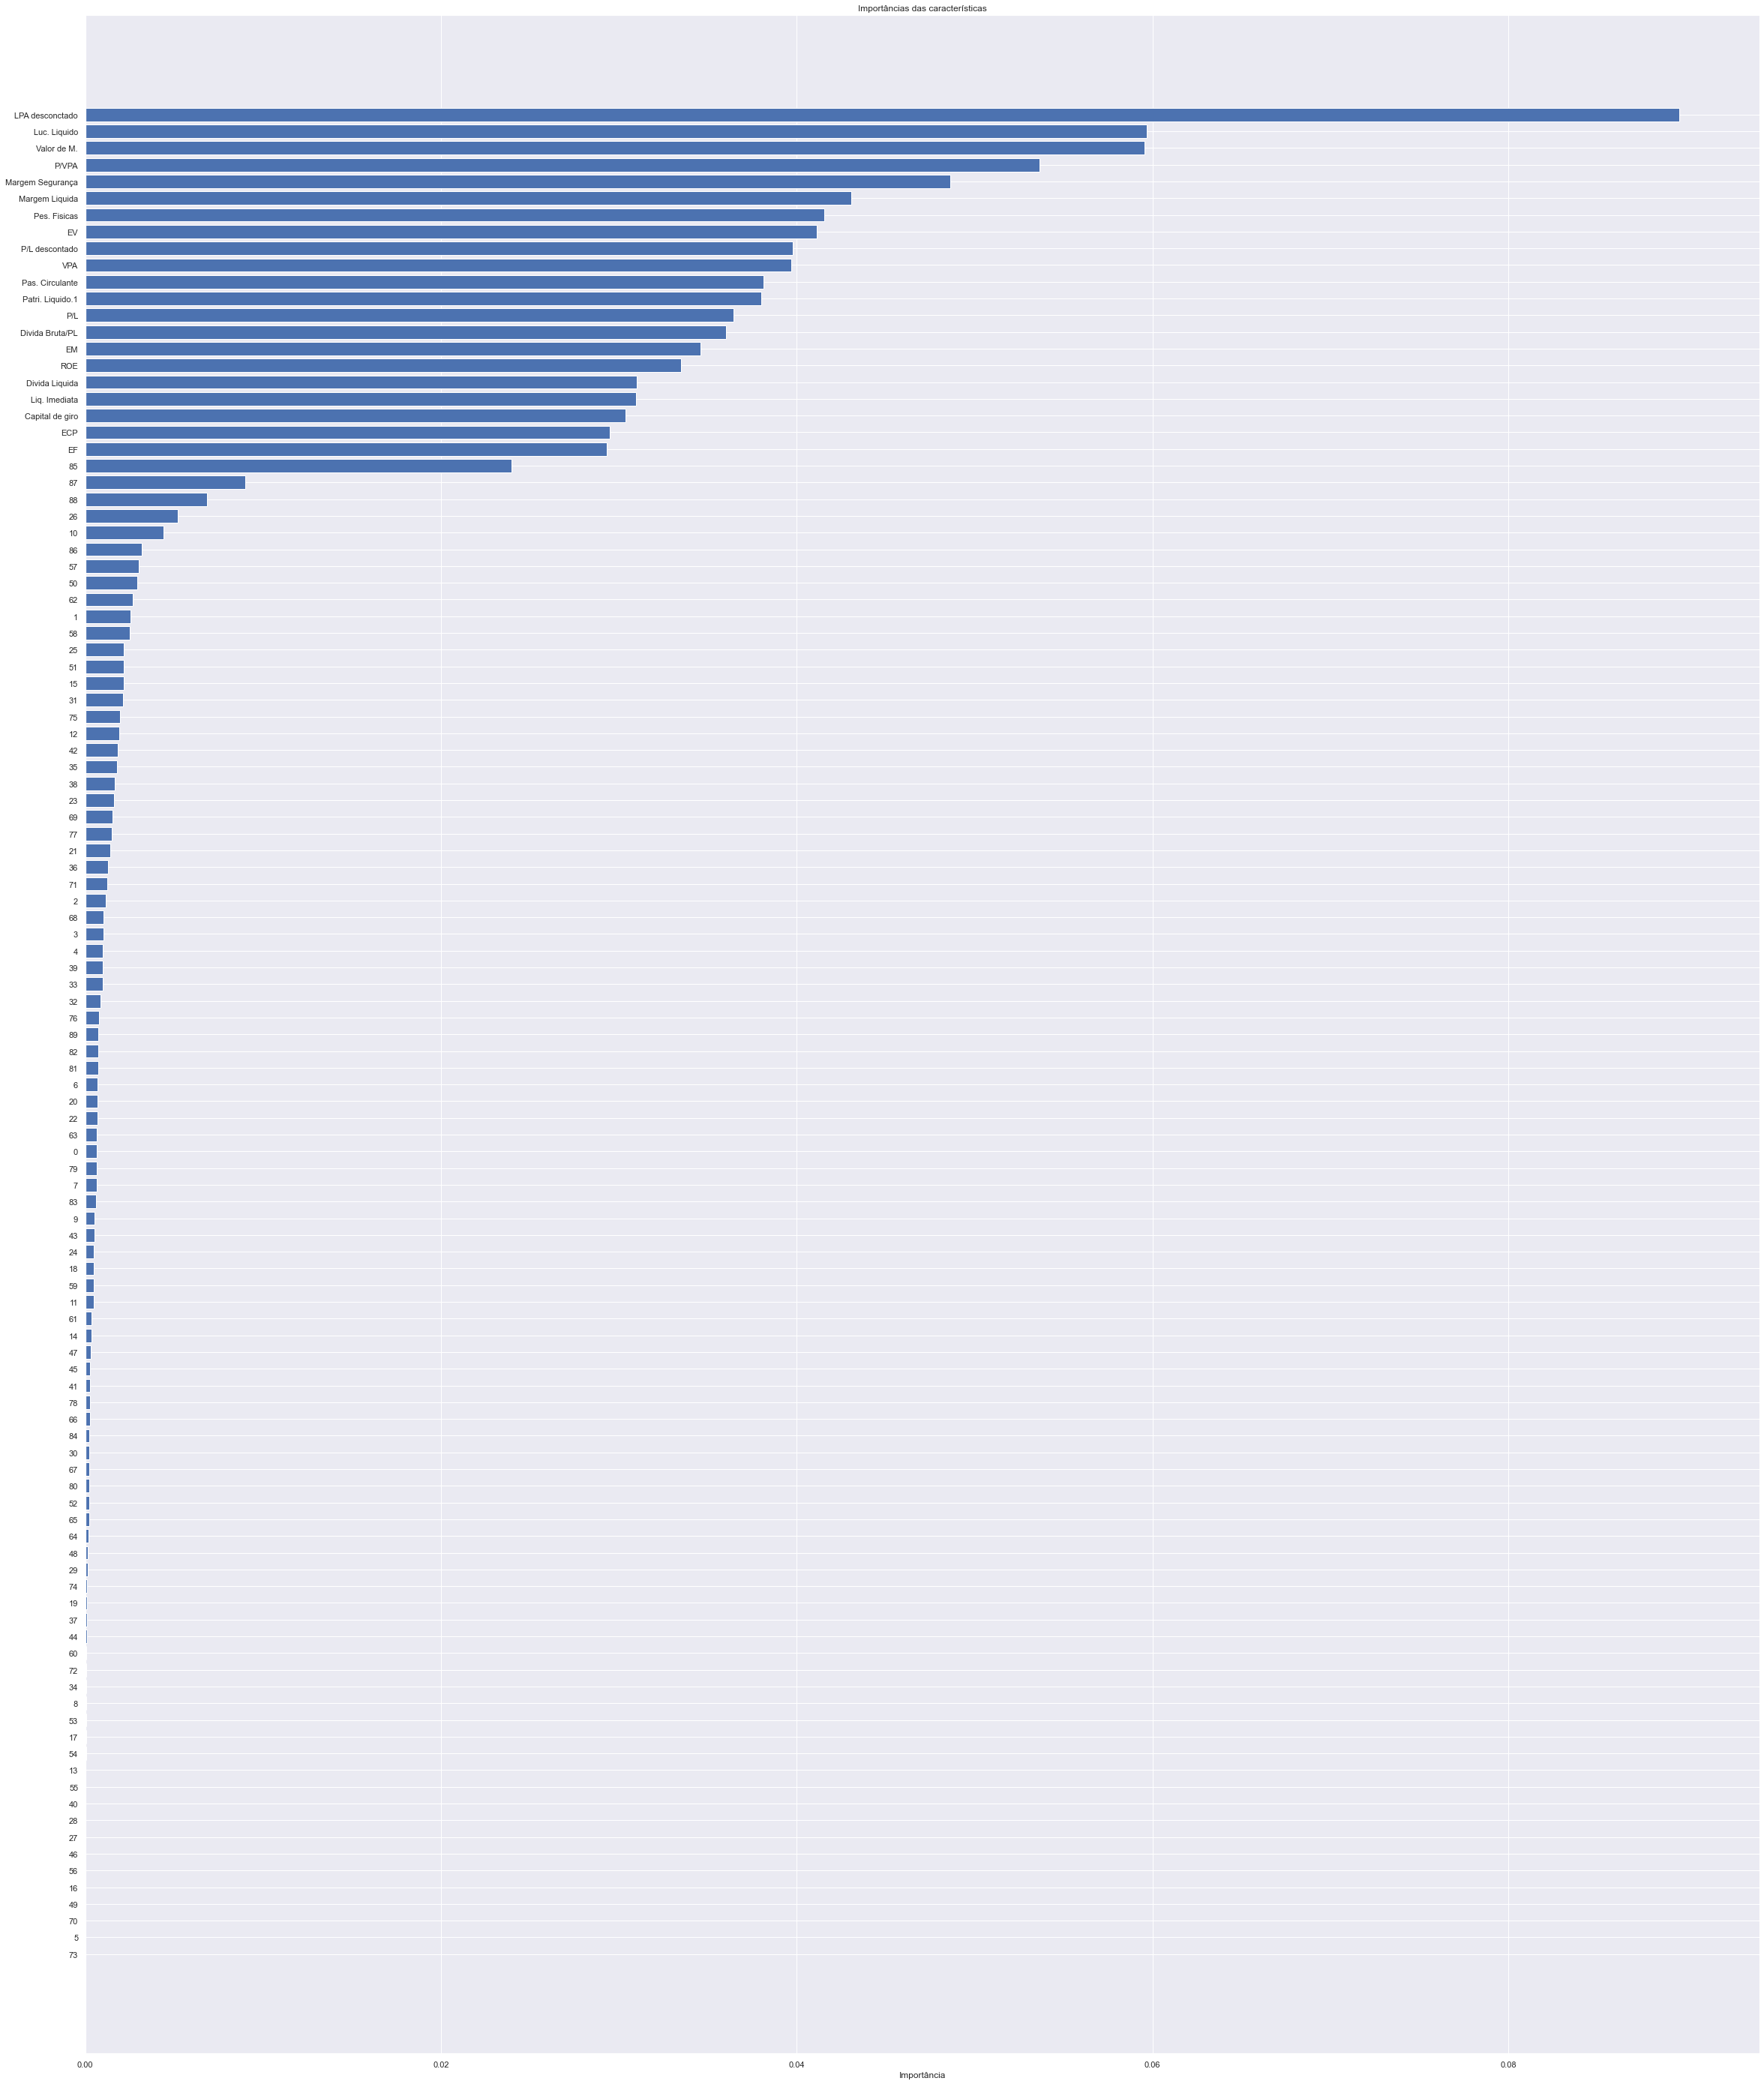

In [113]:
plt.figure(figsize=(40,50))
plt.title('Importâncias das características')
plt.barh(range(len(indices)), importancias[indices], color='b', align='center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importância')
plt.show()

In [114]:
import pickle

In [115]:
with open('bases_classificacao.pkl', 'wb') as f:
    pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)

#### Redes Neurais Artifíciais

In [71]:
neural_network = MLPClassifier()
neural_network.fit(X_train, y_train)
previsoes = neural_network.predict(X_test)
previsoes.shape

C:\Users\mjuli\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(70,)

In [72]:
accuracy_score(y_test, previsoes)

0.5714285714285714

<AxesSubplot:>

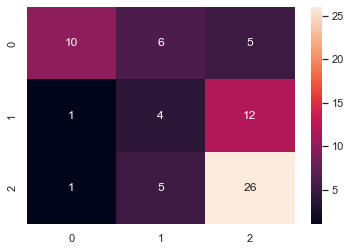

In [73]:
srn.heatmap(confusion_matrix(y_test, previsoes), annot=True)

In [74]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         boa       0.83      0.48      0.61        21
       medio       0.27      0.24      0.25        17
        ruim       0.60      0.81      0.69        32

    accuracy                           0.57        70
   macro avg       0.57      0.51      0.52        70
weighted avg       0.59      0.57      0.56        70



## Exercício

In [117]:
from sklearn.model_selection import GridSearchCV

In [116]:
parametros = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6], 
              'n_estimators': [50, 100, 150]}

In [118]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=parametros)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 100} 0.6600414078674948
